<a href="https://colab.research.google.com/github/on1ystar/Do-it-DL/blob/master/03_%EC%88%98%EC%B9%98%EC%98%88%EC%B8%A12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03-3 손실 함수와 경사 하강법

---

## 손실 함수  

**예상한 값과 실제 타깃값의 차이를 함수로 정의한 것**으로 보통 ***'제곱 오차 '*** 를 손실 함수로 사용한다.  

***제곱 오차(squared error)***는 다음과 같다.  

$$SE = (y-\hat{y})^2$$  

경사 하강법은 이런 식으로 <u>정의된 손실 함수의 최소가 되는 지점을 찾아가는 방법</u>이다.  

 위 식을 전개해 보면 가중치 w와 절편 b에 대한 2차식으로 각각 나타낼 수 있다.  

$$(y-\hat{y})^2 = y^2 + (x^2w^2 + b^2 + 2xwb) - 2y(xw+b)$$
$$ = x^2w^2 + (2xb - 2xy)w + y^2 + b^2 -2yb$$
$$ = b^2 + (2xw - 2y)b + y^2 + x^2w^2 - 2xyw$$

식을 보면 w^2의 계수와 b^2의 계수가 항상 양수이므로 아래로 볼록한 형태의 2차 함수 그래프가 그려진다.  

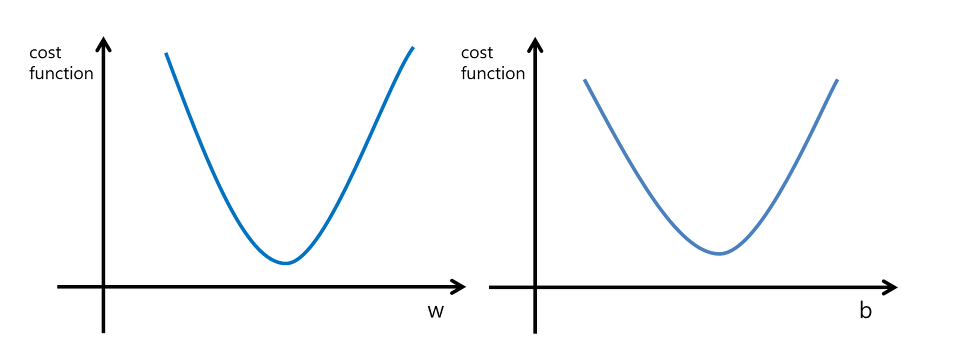

## 경사 하강법 (Gradient descent)
경사 하강법은 위 그래프에서 최소값인 접선의 기울기가 0이 되는 지점, 즉 미분값이 0인 점을 찾는 방법이다.  
방법은 임의의 w 또는 b인 점에서 시작해 그 점에서의 접선의 기울기인 편미분 값을 빼나가는 것이다.  

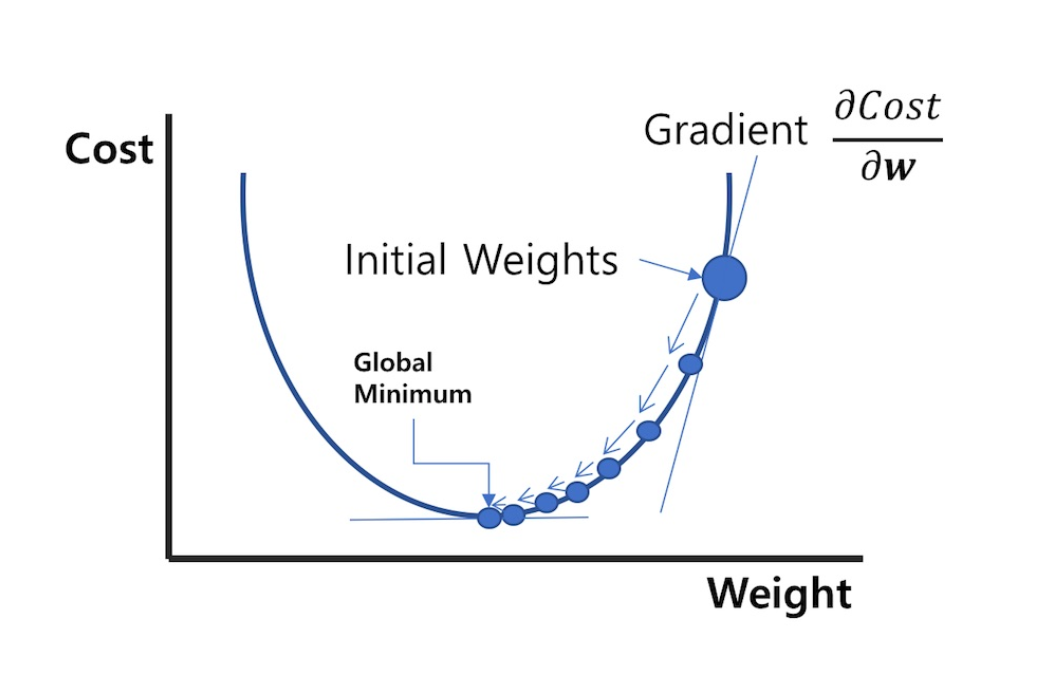

먼저 w에 대해 편미분한 식은 다음과 같다.  

$$\frac{\partial (y-\hat{y})^2}{\partial w} = 2(y-\hat{y})(-\frac {\partial\hat{y}}{\partial w}) = -2(y-\hat{y})x$$  

이때 깔끔한 식을 위해 보통 초기 제곱 오차 공식을

$$\frac {1}{2}(y-\hat{y})^2$$  

로 정의하여 결과가  

$$-(y-\hat{y})x$$  

가 되도록 한다. 이는 손실 함수에 상수를 곱하거나 나누어도 최종 모델의 가중치나 절편에 영향을 주지 않기 때문이다.  
위 결과가 가중치에 대한 제곱 오차(손실 함수)의 변화율이다. 이제 가중치 업데이트를 위해 w에서 빼면  

$$w = w + (y-\hat{y})x$$  

식이 유도된다.이는 앞의 오차 역전파 식과 동일한 식이 된다.  

절편 역시 식을 전개해 보면 동일해진다.  

이런 식으로 w와 b를 업데이트 해 나가다 보면 각각의 변화율 값이 점점 작아지면서 결과적으로 손실 함수의 최소값에 근접하게 된다.  

여기서 변화율을 ***경사(gradient)***라 칭하며, 이 경사가 점점 완만해지며 아래로 내려가는 모습에 의해 경사 하강법이라 한다.

# 03-4 선형 회귀를 위한 뉴런 클래스


---



## 1. \_\_init()\_\_ 메서드  



In [0]:
class Neuron:
  
  def __init__(self):
    self.w = 1.0
    self.b = 1.0


## 2. 정방향 계산  

3개의 입력 신호(w, b, x)를 가지고 예측값(y-hat)을 계산하는 것

In [0]:
  def forpass(self, x):
    y_hat = self.w * x + self.b
    return y_hat
    

## 3. 역방향 계산  

gradient를 이용해 w와 b을 업데이트 하는 것  
즉, 오차가 역방향으로 전파되기 때문에 ***오차 역전파(backpropagation)***라는 말을 사용  


In [0]:
  def backprop(self, x, err):
    w_grad = x * err
    b_grad = 1 * err
    return w_grad, b_grad

## 4. 훈련을 위한 fit() 메서드  



In [0]:
  def fit(self, x, y, epochs = 100):
    for i in range(epochs):
      for x_i, y_i in zip(x, y):
        y_hat = self.forpass(x_i)
        err = -(y_i - y_hat)
        w_grad, b_grad = self.backprop(x_i, err)
        self.w -= w_grad
        self.b -= b_grad

## 5. 모델 훈련  

In [0]:
from sklearn.datasets import load_diabetes

class Neuron:
  
  def __init__(self):
    self.w = 1.0
    self.b = 1.0

  def forpass(self, x):
    y_hat = self.w * x + self.b
    return y_hat

  def backprop(self, x, err):
    w_grad = x * err
    b_grad = 1 * err
    return w_grad, b_grad

  def fit(self, x, y, epochs = 100):
    for i in range(epochs):
      for x_i, y_i in zip(x, y):
        y_hat = self.forpass(x_i)
        err = -(y_i - y_hat)
        w_grad, b_grad = self.backprop(x_i, err)
        self.w -= w_grad
        self.b -= b_grad
        
diabetes = load_diabetes()
x = diabetes.data[:, 2]
y = diabetes.target

neuron = Neuron()
neuron.fit(x, y)

## 6. 시각화


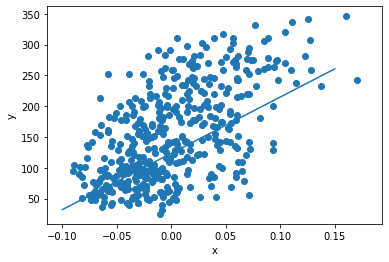

In [12]:
import matplotlib.pyplot as plt

plt.scatter(x, y)
pt1 = (-0.1, -0.1*neuron.w + neuron.b)
pt2 = (0.15, 0.15*neuron.w + neuron.b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

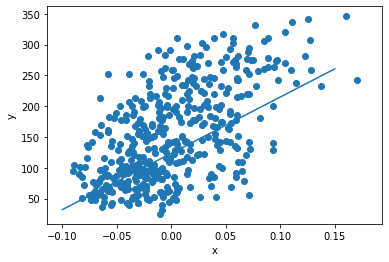

In [13]:
neuron.fit(x, y, epochs=500)

plt.scatter(x, y)
pt1 = (-0.1, -0.1*neuron.w + neuron.b)
pt2 = (0.15, 0.15*neuron.w + neuron.b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()